 1. Delivery_time -> Predict delivery time using sorting time
 
 Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [122]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [123]:
import warnings
warnings.filterwarnings('ignore')


In [124]:
#Read the dataset
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [125]:
#print columns
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

### EDA and Data Visualization

In [126]:
#check shape of data
data.shape

(21, 2)

In [127]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [128]:
#check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [129]:
#check null values in data
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [130]:
#check datatypes of data
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

0.3523900822831107


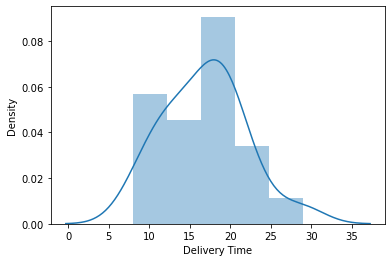

In [131]:
#plot distplot
sns.distplot(data['Delivery Time'])
print(data['Delivery Time'].skew())


0.047115474210530174


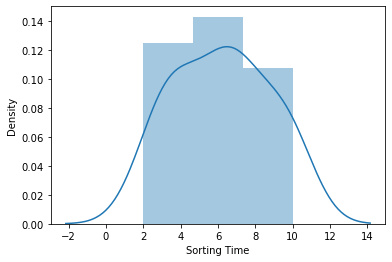

In [132]:
#plot distplot
sns.distplot(data['Sorting Time'])
print(data['Sorting Time'].skew())

### Feature Engineering 

In [133]:
#rename the columns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Correlation Analysis

In [134]:
#check correlation
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

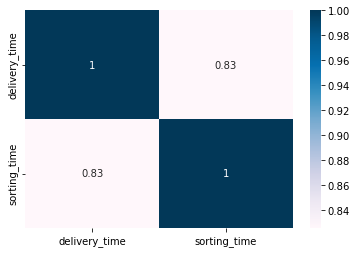

In [135]:
#generate heatmap
sns.heatmap(data.corr(),cmap='PuBu',annot = True)

### Defining Feature & Target from Data

In [136]:
# Defining Feature & Trget from Data
X=data['sorting_time'] # Feature
Y=data['delivery_time'] # Target


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

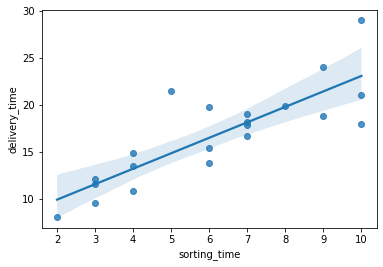

In [137]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])
#sns.regplot(X,Y)

## Fitting a Linear Regression Model

In [138]:
model=smf.ols('delivery_time~sorting_time',data=data).fit()

In [139]:
#check summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        11:33:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing 

In [140]:
#Finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [141]:
#Finding t-values and p-values
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [142]:
#Finding Rsquared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Model Prediction 

In [143]:
newdata=pd.Series([10,4])
newdata

0    10
1     4
dtype: int64

In [144]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,10
1,4


In [145]:
model.predict(data_pred)

0    23.072933
1    13.178814
dtype: float64

### Normalizate Data using MinMaxScaler

In [146]:
#Normalization of data
data2 = data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data2 = pd.DataFrame(mm.fit_transform(data2))

In [147]:
x=data2.iloc[:,-1] # Feature
y=data2.iloc[:,0] # Target

### SquareRoot Transformation 

In [148]:
#apply square root transformation
sqrt_transform = np.sqrt(data2)
x=sqrt_transform.iloc[:,-1] # Feature
y=sqrt_transform.iloc[:,0] # Target


In [149]:
sqrt_transform

,0,1
0,0.786796,1.000000
1,0.511766,0.500000
2,0.748013,0.707107
3,0.872872,0.935414
4,1.000000,1.000000
5,0.591608,0.707107
6,0.723747,0.790569
7,0.267261,0.353553
8,0.686607,1.000000
9,0.715475,0.935414


<AxesSubplot:ylabel='Density'>

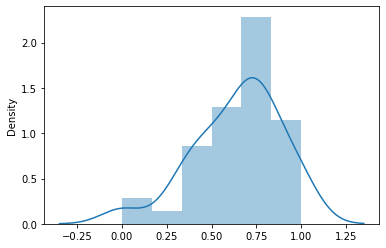

In [150]:
sns.distplot(sqrt_transform)

Intercept    0.096812
x            0.757264
dtype: float64

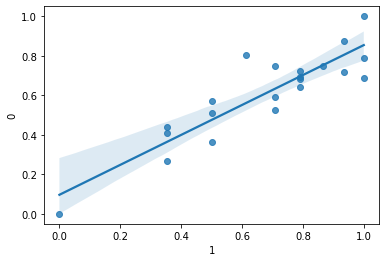

In [151]:
sns.regplot(x,y)
model2=smf.ols("y~x",data=sqrt_transform).fit()
model2.params

In [152]:
#Finding Rsquared values
(model2.rsquared,model2.rsquared_adj)

(0.7973175680577437, 0.7866500716397302)

## Log Transformation 

In [153]:
#apply log transformation
log_transform = np.log(data)
x=log_transform.iloc[:,-1] # Feature
y=log_transform.iloc[:,0] # Target


In [154]:
log_transform

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<AxesSubplot:ylabel='Density'>

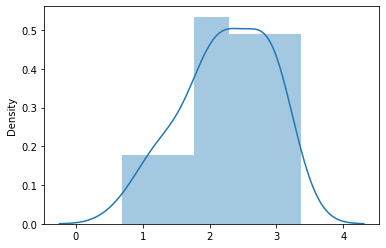

In [155]:
sns.distplot(log_transform)

Intercept    1.741987
x            0.597522
dtype: float64

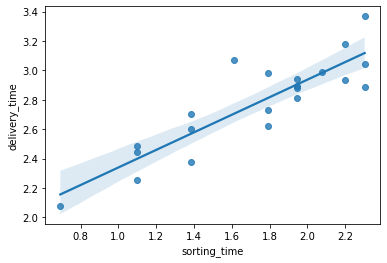

In [156]:
sns.regplot(x,y)
model3=smf.ols("y~x",data=log_transform).fit()
model3.params

In [157]:
#Finding Rsquared values
(model3.rsquared,model3.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

### Conclusion:
#### 'SquareRoot' Transformation Gives Best R2 score value.